# Random forest for b-tagging

In [24]:
%load_ext autoreload
%autoreload 2
from bob import *
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load dataframe

In [25]:
inputFileName = 'Hybrid_25_July_bugfixed_fullStat.pkl'

# Subsample the dataset for fast execution
subsampleFlag = True

In [26]:
tree = pd.read_pickle(inputFileName)
features = select_features(tree, to_remove=[])

if subsampleFlag:
    tree = tree.head(int(tree.shape[0]*0.05))

train, test = train_test_splitting(tree, )

Define the classifier

In [27]:
clf = skensamble.RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=None, class_weight = 'balanced', warm_start=True)

Training

In [28]:
%%time
clf.fit(train[features], train['jet_LabDr_HadF'].values, sample_weight=train['weights'].values)

CPU times: user 2min 35s, sys: 4.51 s, total: 2min 40s
Wall time: 40.7 s


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0, warm_start=True)

Testing

In [29]:
predicted_probabilities = clf.predict_proba(test[features])

In [30]:
fpr_c_rf, tpr_c_rf = compute_roc(test['jet_LabDr_HadF'].values, predicted_probabilities, 'c')
fpr_l_rf, tpr_l_rf = compute_roc(test['jet_LabDr_HadF'].values, predicted_probabilities, 'l')
fpr_c_mv, tpr_c_mv = compute_roc(test['jet_LabDr_HadF'].values, test['jet_mv2c10'].values, 'c')
fpr_l_mv, tpr_l_mv = compute_roc(test['jet_LabDr_HadF'].values, test['jet_mv2c10'].values, 'l')

Compute rates for comparison in ROC plot

In [31]:
rate_light = 1 /fpr_l_rf[1:] / interpolate.spline(tpr_l_mv[1:], 1/fpr_l_mv[1:], tpr_l_rf[1:], order=1)
rate_c = 1 /fpr_c_rf[1:] / interpolate.spline(tpr_c_mv[1:], 1/fpr_c_mv[1:], tpr_c_rf[1:], order=1)

rate_light[rate_light==np.inf] = np.nan
rate_c[rate_c==np.inf] = np.nan

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app


Plot ROCs (figures are saved in /figures/figureName.eps)

/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: divide by zero encountered in divide
/cvmfs/sft.cern.ch/lcg/views/LCG_93/x86_64-slc6-gcc62-opt/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in divide


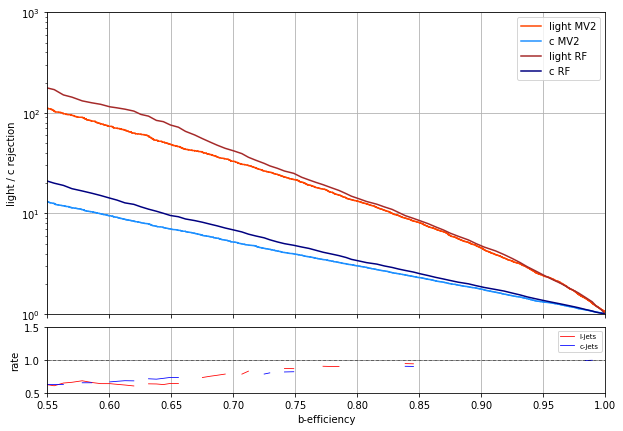

In [32]:
figureName = 'ROC__random_forest_vs_mv2'
fig=plt.figure(figsize=(10,7))

gs=GridSpec(5,1)

ax1=fig.add_subplot(gs[0:4,0])
ax2=fig.add_subplot(gs[4,0])

ax1.set_ylabel("light / c rejection")
ax1.semilogy(tpr_l_mv, 1/fpr_l_mv, label='light MV2', c='orangered')
ax1.semilogy(tpr_c_mv, 1/fpr_c_mv, label='c MV2', c='dodgerblue')

ax1.semilogy(tpr_l_rf, 1/fpr_l_rf, label='light RF', c='brown')
ax1.semilogy(tpr_c_rf, 1/fpr_c_rf, label='c RF', c='navy')

plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set_xlim([0.55, 1])
ax1.set_ylim([1, 1e3])

ax1.grid()
ax1.legend()

ax2.plot(tpr_l_rf[1:], 1/rate_light, c='r', lw=.8,  label='l-jets')
ax2.plot(tpr_c_rf[1:], 1/rate_c, c='b', lw=.8,  label='c-jets')

ax2.axhline(y=1, color='black', linestyle='-.', lw=.5)
ax2.grid()
ax2.set_xlabel("b-efficiency")
ax2.set_ylabel("rate")
ax2.set_xlim([0.55, 1])
ax2.set_ylim([0.5, 1.5])
ax2.legend(fontsize = 'x-small')

plt.savefig('figures/'+ figureName + '.eps', format='eps')
plt.show()

Rejection vs pt for flat b-efficiencies

bob.py:157: RuntimeWarning: divide by zero encountered in divide
  l_rej = interpolate.spline(tpr, 1/fpr, b_eff, order=1)
bob.py:161: RuntimeWarning: divide by zero encountered in divide
  l_rej = interpolate.spline(tpr, 1/fpr, b_eff, order=1)
bob.py:171: RuntimeWarning: divide by zero encountered in divide
  c_rej = interpolate.spline(tpr, 1/fpr, b_eff, order=1)
bob.py:174: RuntimeWarning: divide by zero encountered in divide
  c_rej = interpolate.spline(tpr, 1/fpr, b_eff, order=1)


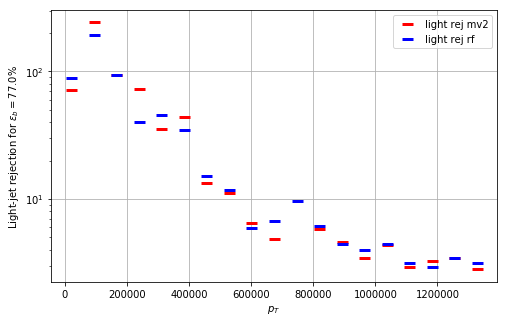

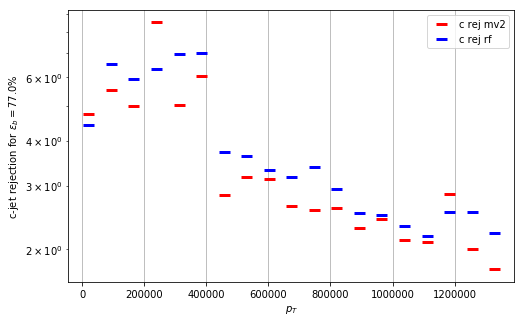

In [35]:
rejection_pt(test, test['jet_mv2c10'].values, predicted_probabilities, num_cuts=20, b_eff=.77)
plt.savefig('figures/_random_forest_vs_mv2_pt_flat_eff.eps', format='eps')
plt.show()